In [1]:
import random
import itertools
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2025, 2, 24)

tickers = ['AAPL','MSFT','F','BAC','NKE','V','DIS']

n_tickers_selected = 4
n_combinations = 20

sampled_combinations = random.sample(list(itertools.combinations(tickers, n_tickers_selected)), n_combinations)

In [3]:
all_portfolios = []
rf = 0.0415

for combination in sampled_combinations:
    data = yf.download(list(combination), start= start_date, end = end_date, progress= False)["Close"]
    returns = data.pct_change().dropna()
    covariance_matrix = returns.cov()

    annual_returns = returns.mean() * 252
    annual_cov = covariance_matrix * 252

    # Numero de simulaciones de ponderaciones
    num_portafolios = 10000

    weights_array = np.zeros((num_portafolios, n_tickers_selected))
    returns_array = np.zeros(num_portafolios)
    risk_array = np.zeros(num_portafolios)
    sharpe_array = np.zeros(num_portafolios)

    for i in range(num_portafolios):
        # generas los pesos aleatorios para cada portafolio
        weights = np.random.random(n_tickers_selected)
        weights = weights / np.sum(weights)

        # obteniendo rendimiento y volatilidad esperada anual por portafolio
        portfolio_return = np.dot(annual_returns, weights)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

        # guardando historicos
        weights_array[i, :] = weights
        returns_array[i] = portfolio_return
        risk_array[i] = portfolio_risk
        sharpe_array[i] = (portfolio_return - rf) / portfolio_risk

    portfolios = pd.DataFrame({
        "Returns": returns_array,
        "Risk": risk_array,
        "Sharpe": sharpe_array
    })

    for i, symbol in enumerate(combination):
        portfolios[symbol + " Weight"] = weights_array[:, i]

    all_portfolios.append(portfolios)

YF.download() has changed argument auto_adjust default to True


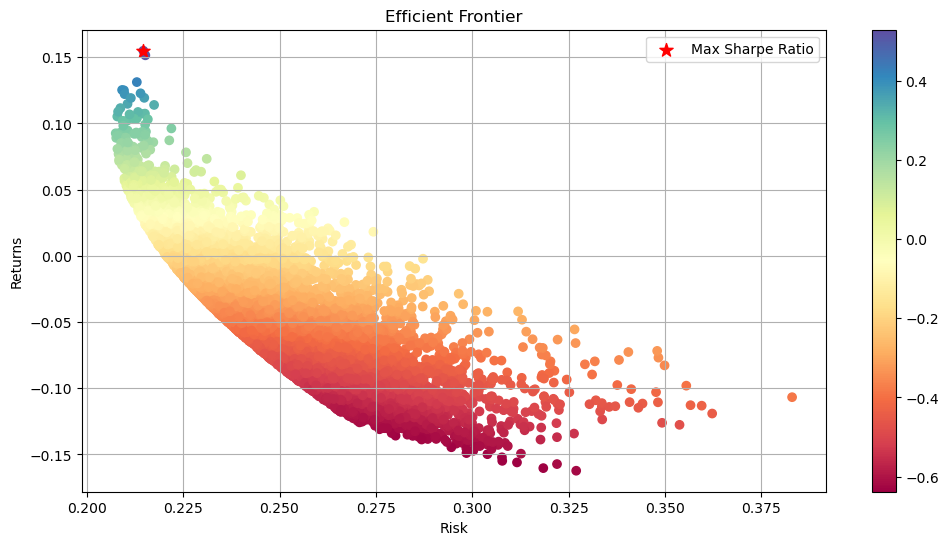

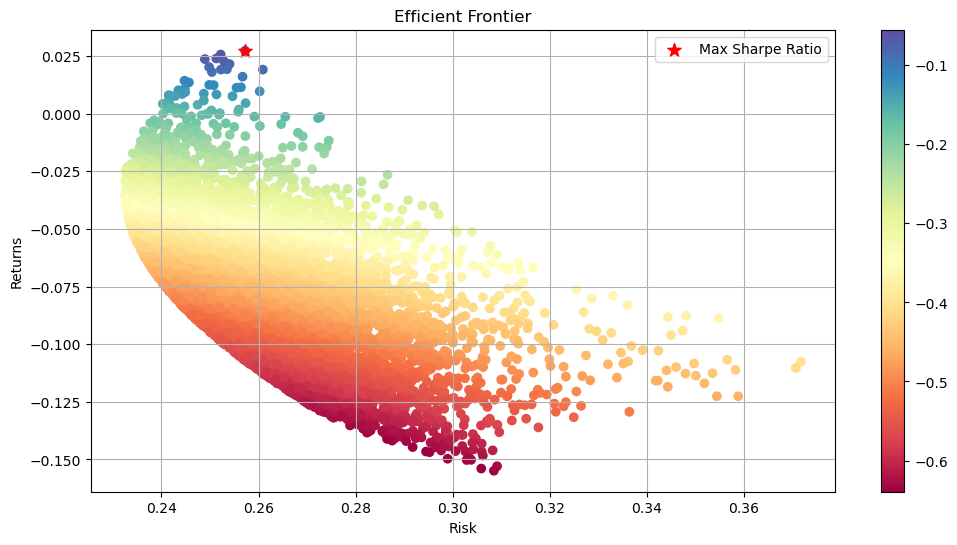

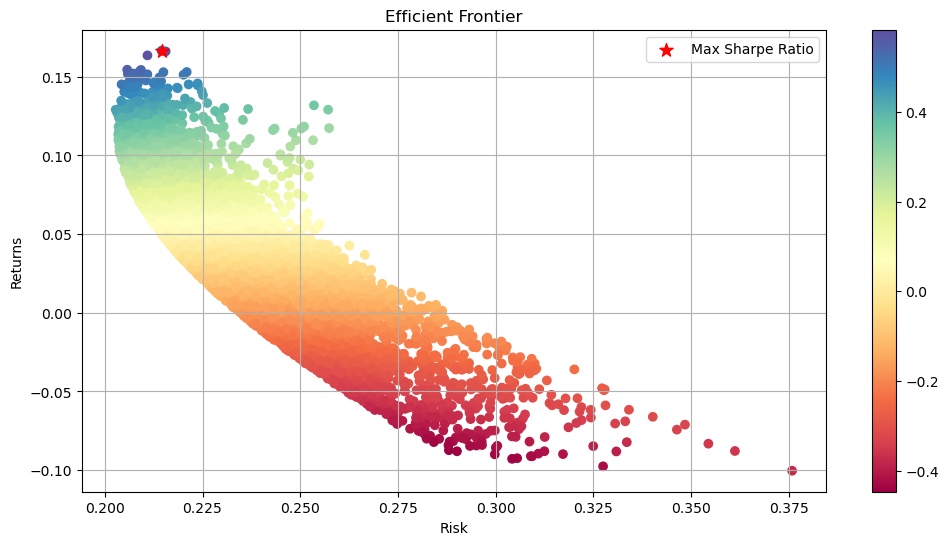

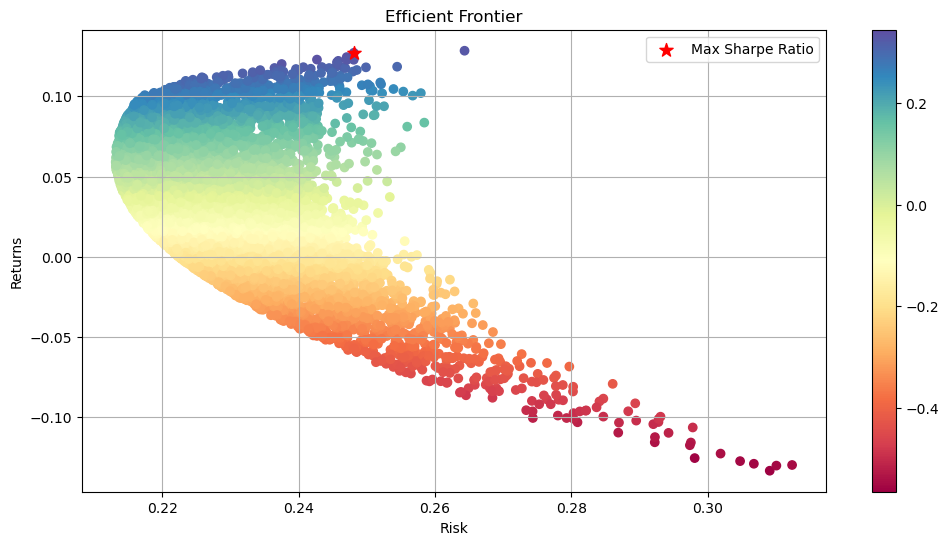

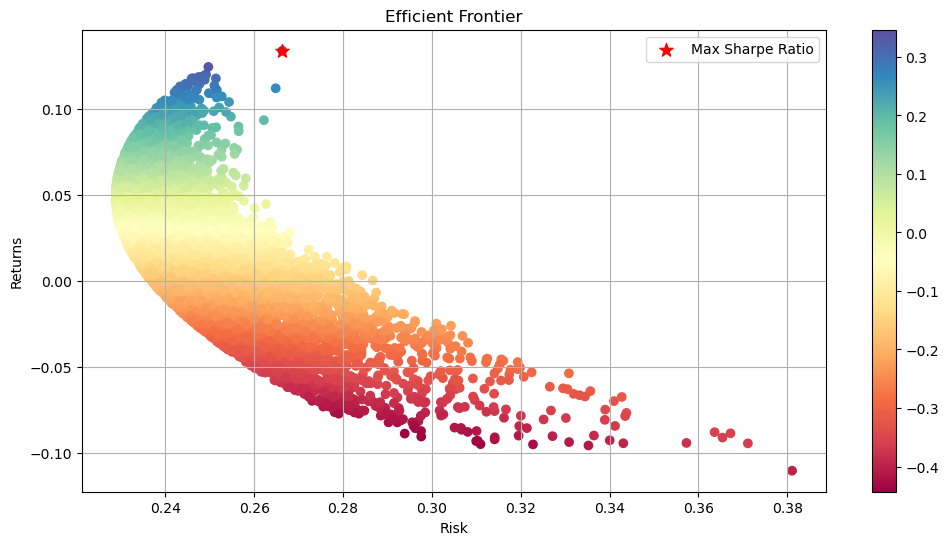

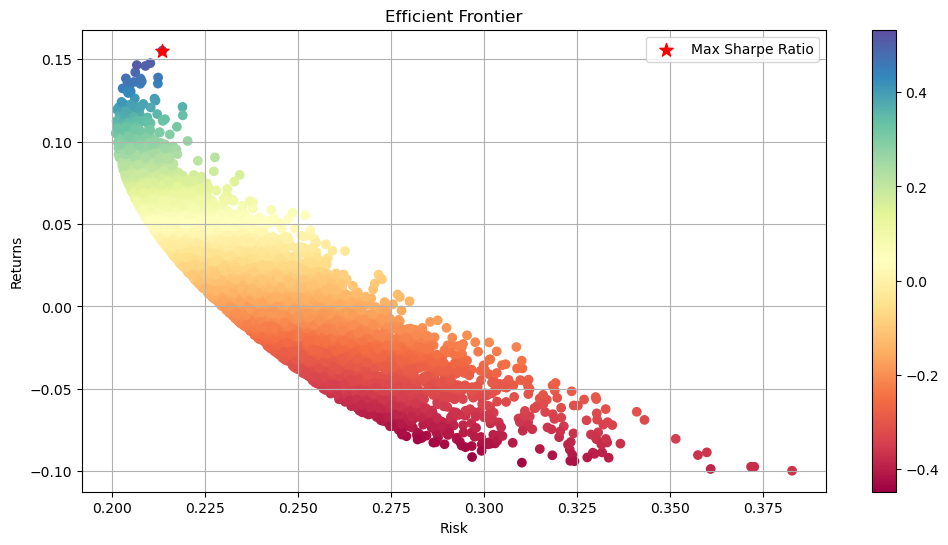

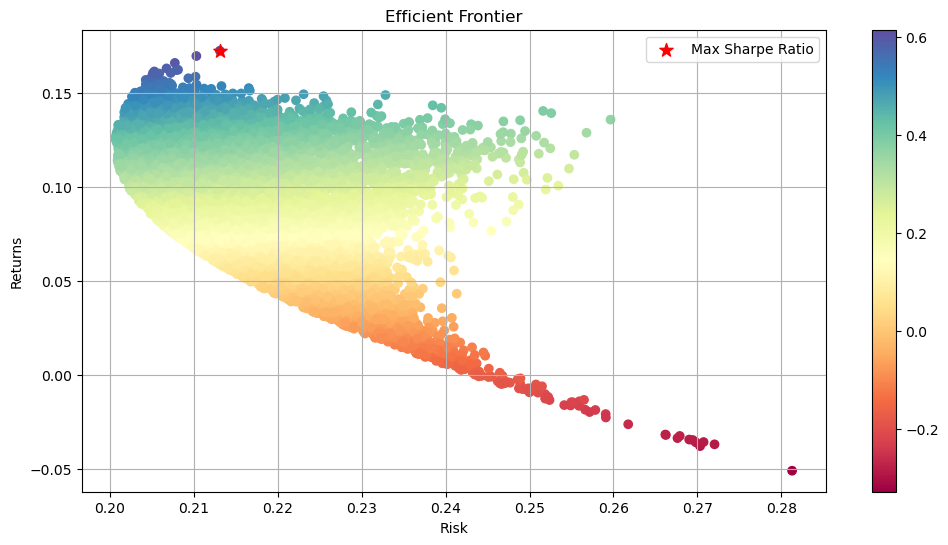

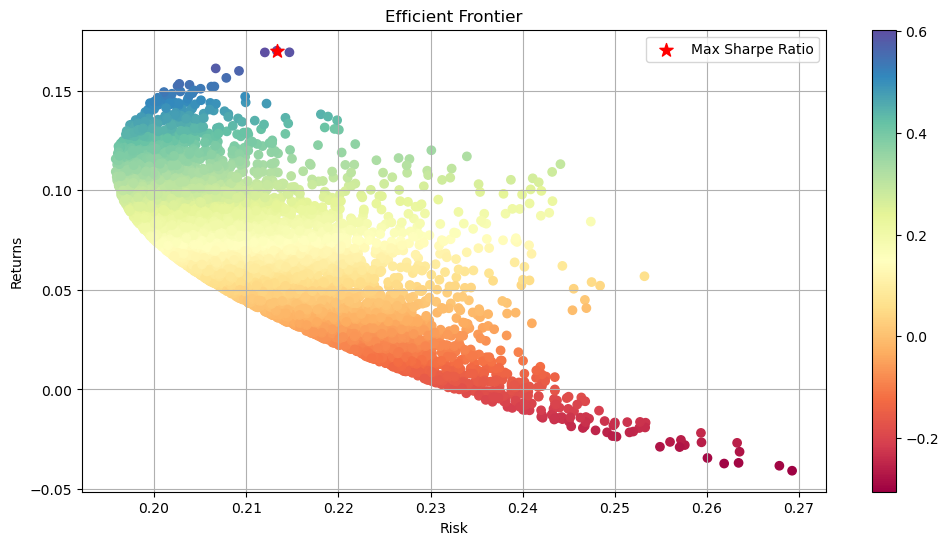

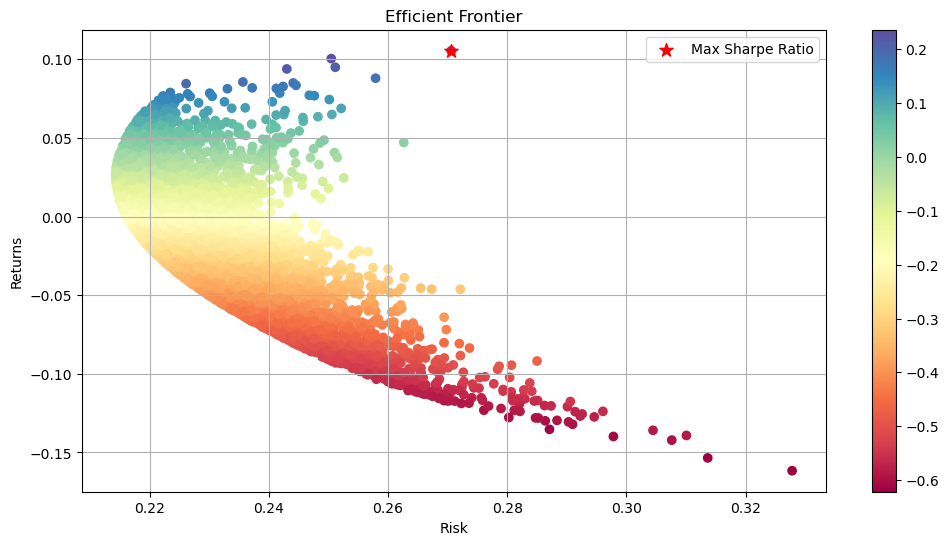

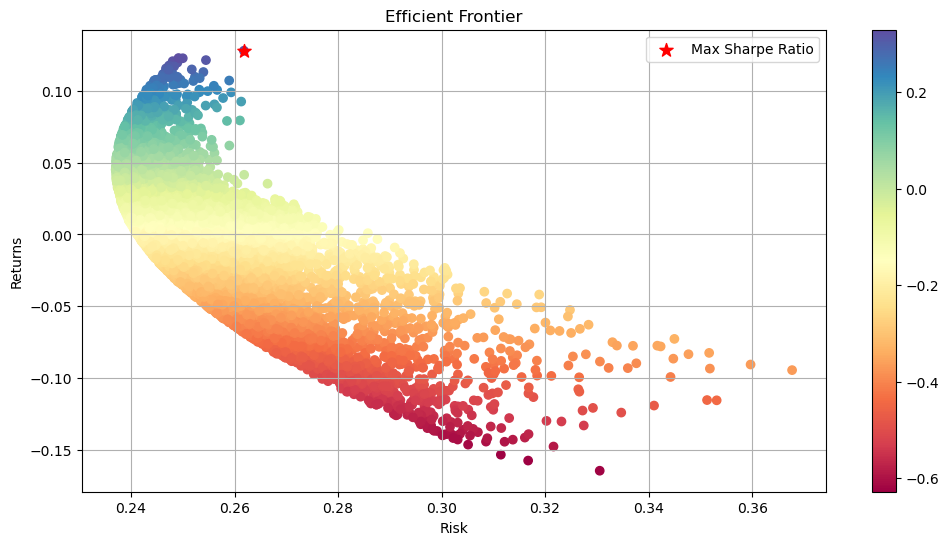

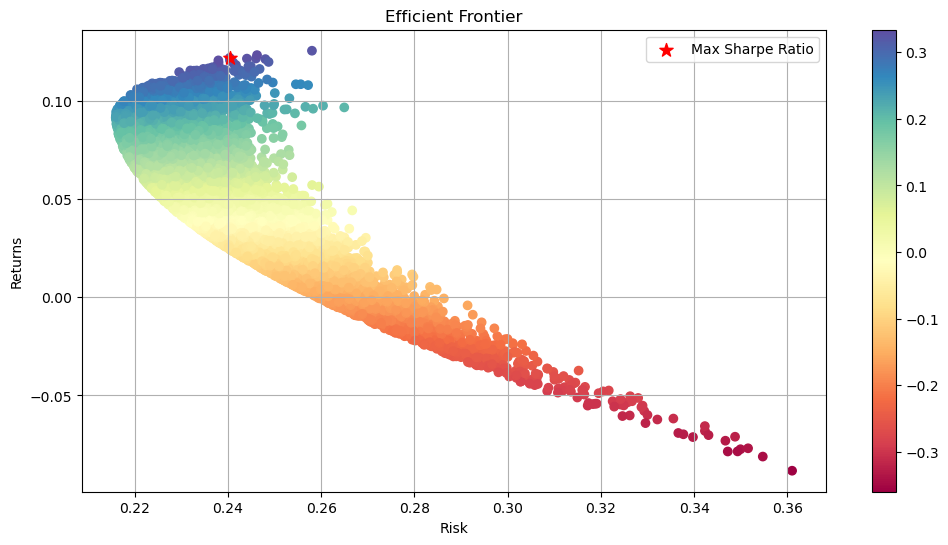

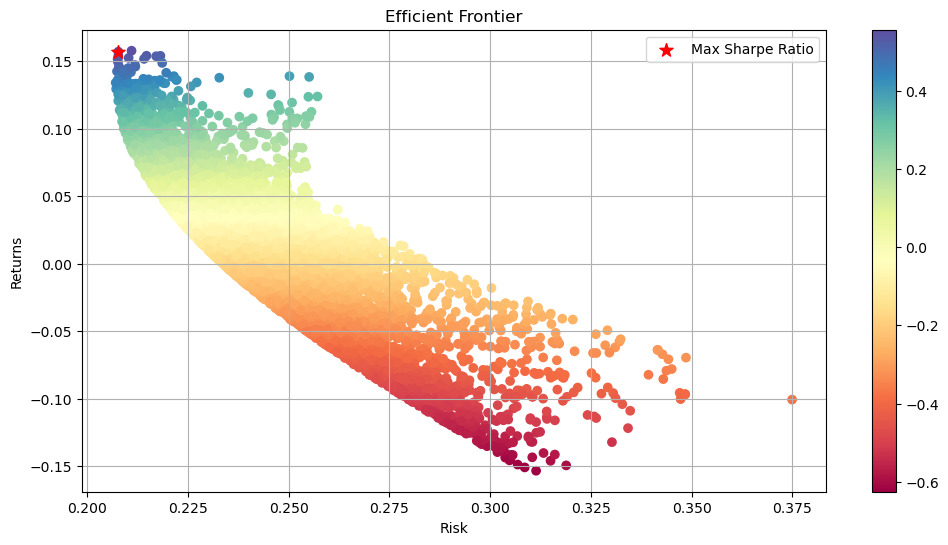

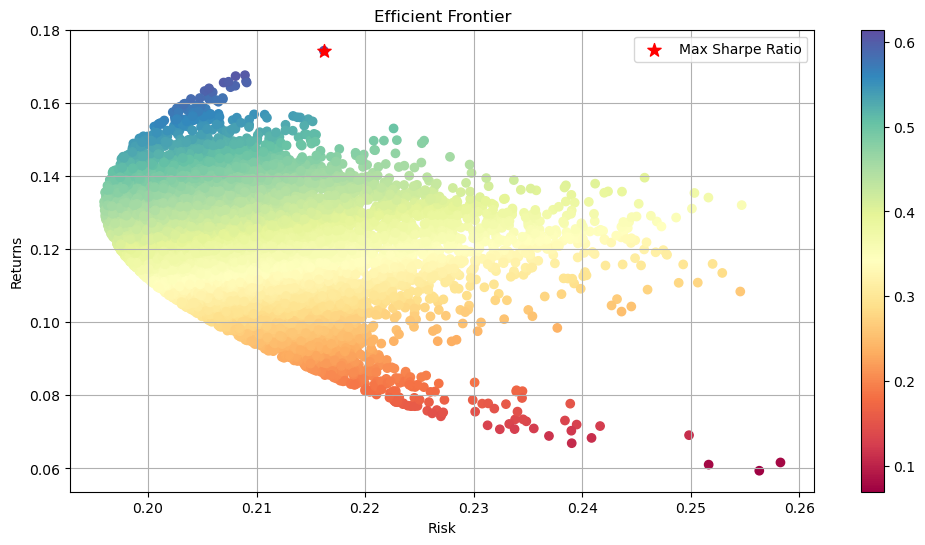

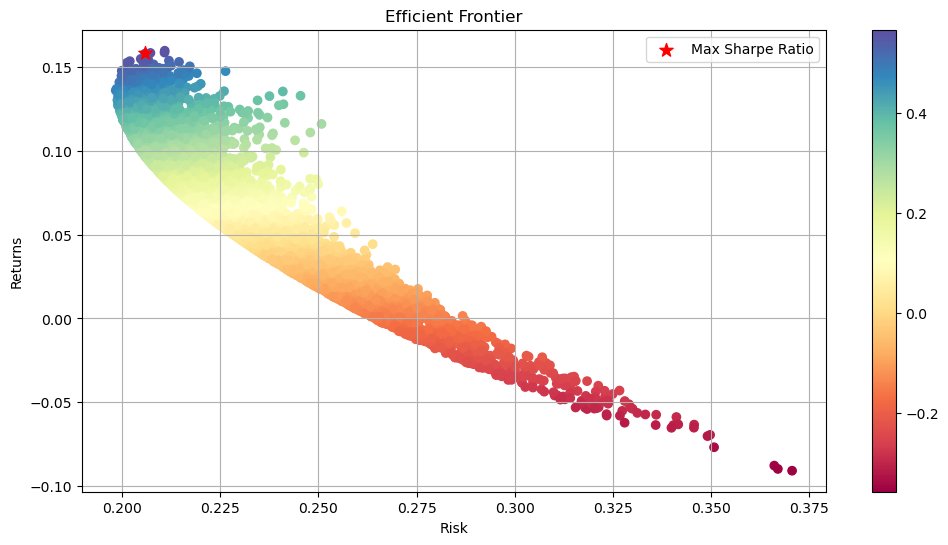

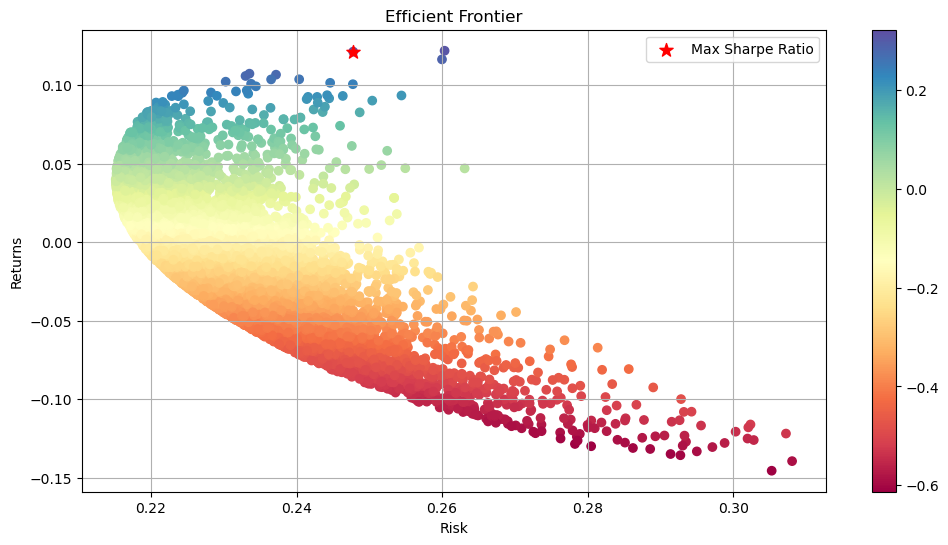

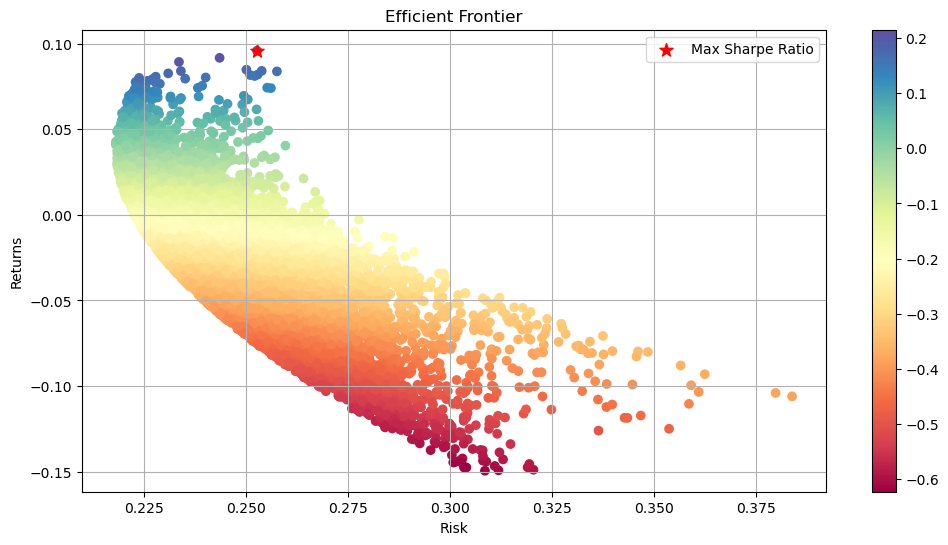

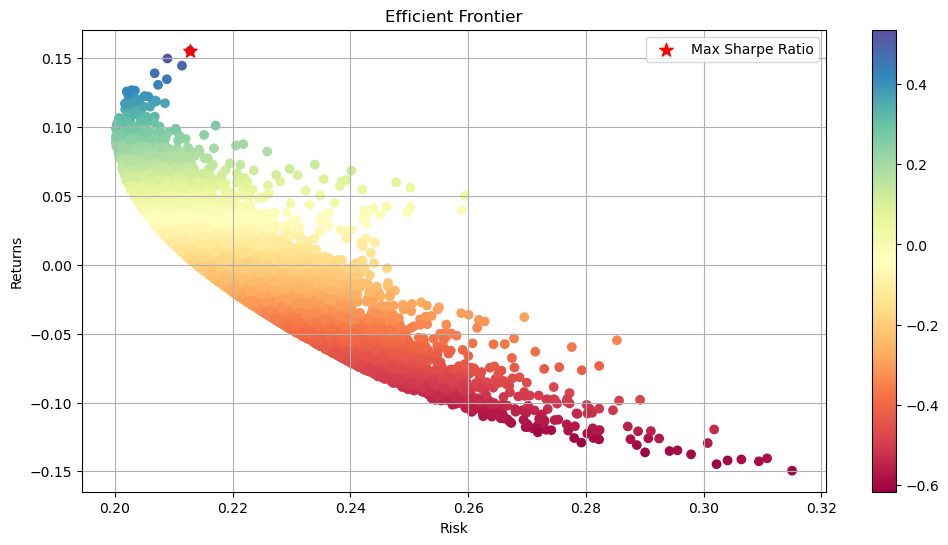

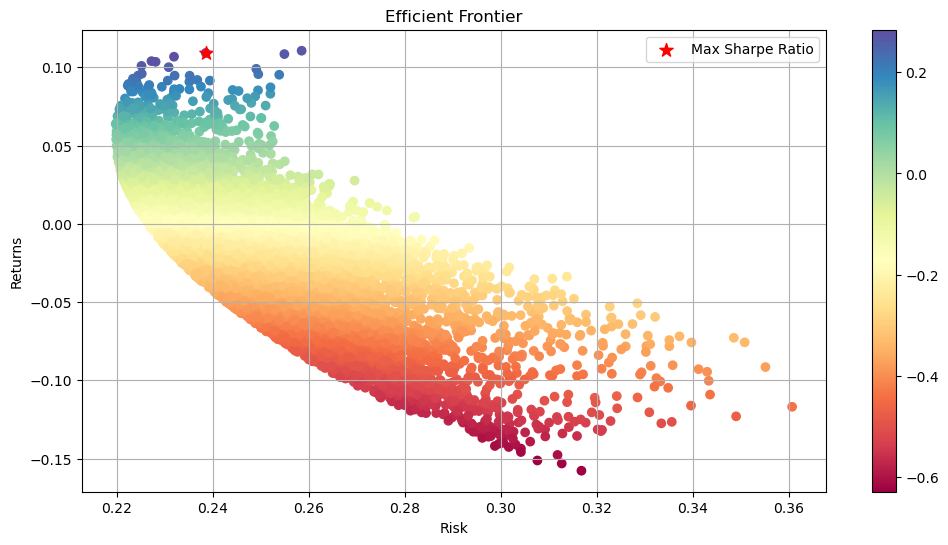

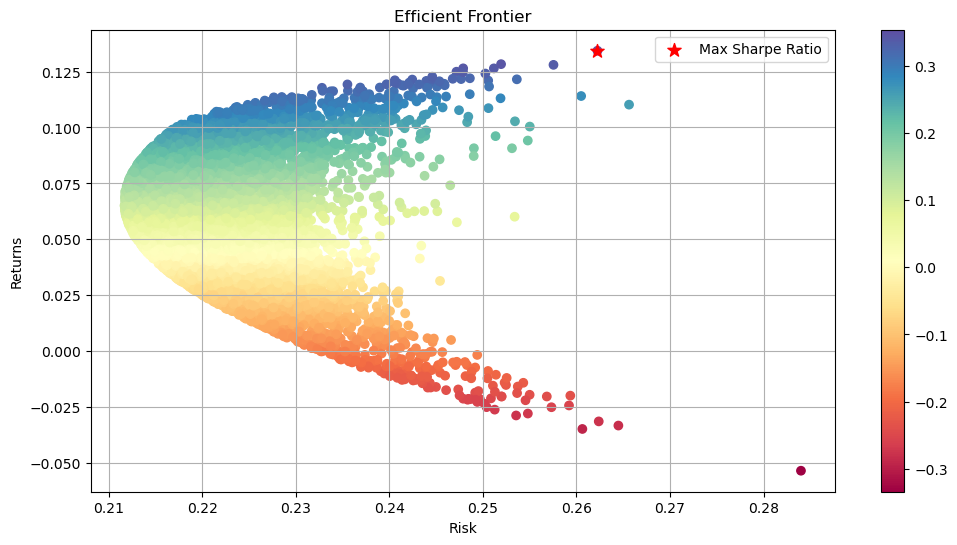

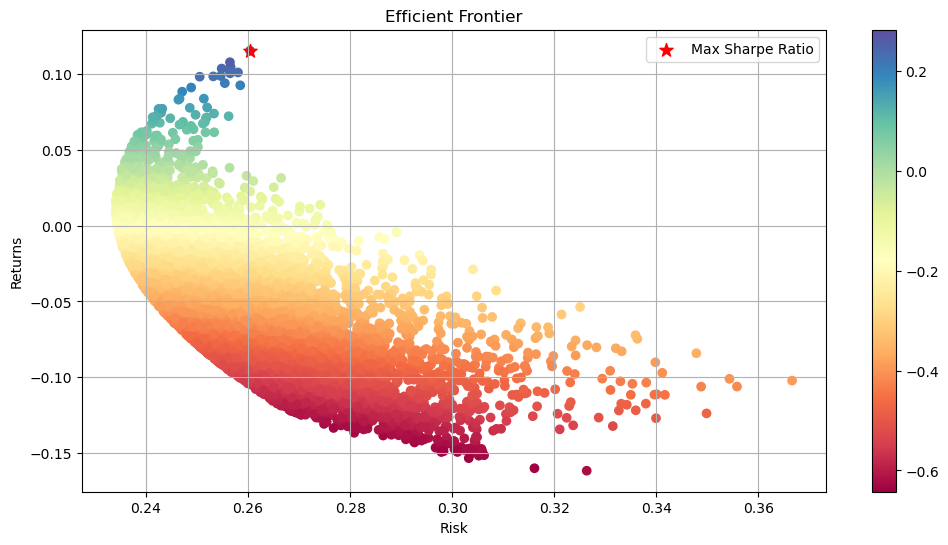

In [4]:
for i in range(n_combinations):
    plt.figure(figsize=(12, 6))
    sharpe_values = all_portfolios[i]['Sharpe']
    vmin = sharpe_values.min()
    vmax = sharpe_values.max()
    scatter = plt.scatter(all_portfolios[i]['Risk'], all_portfolios[i]['Returns'], c=sharpe_values, cmap='Spectral', vmin=vmin, vmax=vmax)

    max_sharpe_idx = all_portfolios[i]['Sharpe'].idxmax()
    max_sharpe = all_portfolios[i].loc[max_sharpe_idx]
    plt.scatter(max_sharpe['Risk'], max_sharpe['Returns'], c='red', s=100, marker='*', label='Max Sharpe Ratio')

    plt.xlabel('Risk')
    plt.ylabel('Returns')
    plt.title('Efficient Frontier')
    plt.legend()
    plt.colorbar(scatter)
    plt.grid()
    plt.show()

In [5]:
todo = pd.concat(all_portfolios)
top_10 = todo.nlargest(10, 'Sharpe')
top_10

,Returns,Risk,Sharpe,F Weight,NKE Weight,V Weight,DIS Weight,BAC Weight,AAPL Weight,MSFT Weight
3107,0.172426,0.213095,0.614403,NaN,NaN,0.035737,0.909921,NaN,0.052461,0.001881
6806,0.174275,0.216206,0.614116,NaN,NaN,0.961059,NaN,0.002990,0.019025,0.016926
6500,0.169616,0.210300,0.609204,NaN,NaN,0.066063,0.859985,NaN,0.072003,0.001949
3435,0.167332,0.208071,0.604753,NaN,NaN,0.822873,NaN,0.043401,0.111891,0.021835
1831,0.167587,0.208937,0.603470,NaN,NaN,0.849928,NaN,0.045243,0.074264,0.030564
2137,0.170124,0.213317,0.602972,NaN,NaN,0.041979,0.924977,0.002227,NaN,0.030817
9737,0.169273,0.212018,0.602650,NaN,NaN,0.084291,0.899049,0.002738,NaN,0.013922
7001,0.165572,0.206970,0.599468,NaN,NaN,0.808173,NaN,0.037161,0.116972,0.037693
8021,0.165791,0.207430,0.599195,NaN,NaN,0.802262,NaN,0.110408,0.078752,0.008578
1673,0.165946,0.207737,0.599053,NaN,NaN,0.015893,0.725729,NaN,0.257232,0.001146
